## Connect to the GIS

In [3]:
from arcgis.gis import GIS
gis = GIS("https://dev003735.esri.com/portal", "arcgis_python_api", "sharing.1")

# Visualize the aggregate result

In [4]:
agg_result = gis.content.search("Reconstructed_Tracks_ME5KI6")[0]
agg_result

<Item title:"Reconstructed_Tracks_ME5KI6" type:Feature Service owner:arcgis_python_api>

In [5]:
map1 = gis.map()
map1

In [6]:
map1.add_layer(agg_result)

In [7]:
# display hurricanes during any 20 years
map1.start_time = '1842'
map1.end_time = '1862'

## Analyze the attribute info

In [8]:
agg_result_FL = agg_result.layers
agg_result_FL

[<FeatureLayer url:"http://Dev003735.esri.com/server/rest/services/Hosted/Reconstructed_Tracks_ME5KI6/FeatureServer/0">]

In [9]:
query_result = agg_result_FL[0].query(out_fields = "*", returnGeometry = False)
att_data_frame = query_result.df
att_data_frame.head()

,ANY_basin,ANY_center,ANY_iso_time,ANY_name,ANY_nature,ANY_size,ANY_sub_basin,ANY_track_type,COUNT,COUNT_Wind,...,VAR_latitude,VAR_longitude,VAR_num,VAR_pres_wmo1,VAR_pres_wmo_,VAR_season,VAR_wind_wmo1,VAR_wind_wmo_,globalid,serial_num
OBJECTID,,,,,,,,,,,,,,,,,,,,,
3,SI,reunion,1848-03-01 06:00:00,XXXX848001,NR,0,MM,main,7.0,7.0,...,83.445714,60.349524,0.0,0.0,0.0,0.0,0.000000,0.000000,{FFDE68E6-A361-453A-B3F4-D21AFC7D17BD},1848061S12075
7,NA,atcf,1851-06-25 00:00:00,NOT NAMED,TS,80000,MM,main,13.0,13.0,...,1.067436,3.646667,0.0,0.0,0.0,0.0,323.355511,291.025641,{487CF759-5773-4F29-B8BD-22FCE2F880CB},1851176N28265
11,NA,atcf,1852-09-05 00:00:00,NOT NAMED,TS,70000,MM,main,8.0,8.0,...,1.009821,9.245714,0.0,0.0,0.0,0.0,231.490314,164.285714,{40F3F9A4-DDA3-4FF2-8B59-D6CC54101002},1852249N17296
15,NA,atcf,1852-10-06 00:00:00,NOT NAMED,TS,90000,MM,main,24.0,24.0,...,57.113261,33.289837,0.0,0.0,0.0,0.0,153.194247,277.536232,{C297FB08-7D0A-4B8A-A3F9-93D3ED2B9BBA},1852280N17286
19,NA,atcf,1853-10-19 00:00:00,NOT NAMED,TS,70000,MM,main,14.0,14.0,...,2.359176,0.708791,0.0,0.0,0.0,0.0,11.312133,43.956044,{72D7A03C-B818-42BD-BCC0-51B09DE75E86},1853292N28282


In [10]:
att_data_frame.shape

(568, 94)

In [11]:
att_data_frame.columns

Index(['ANY_basin', 'ANY_center', 'ANY_iso_time', 'ANY_name', 'ANY_nature',
       'ANY_size', 'ANY_sub_basin', 'ANY_track_type', 'COUNT', 'COUNT_Wind',
       'COUNT_basin', 'COUNT_center', 'COUNT_iso_time', 'COUNT_latitude',
       'COUNT_longitude', 'COUNT_name', 'COUNT_nature', 'COUNT_num',
       'COUNT_pres_wmo1', 'COUNT_pres_wmo_', 'COUNT_season', 'COUNT_size',
       'COUNT_sub_basin', 'COUNT_track_type', 'COUNT_wind_wmo1',
       'COUNT_wind_wmo_', 'END_DATETIME', 'MAX_Wind', 'MAX_latitude',
       'MAX_longitude', 'MAX_num', 'MAX_pres_wmo1', 'MAX_pres_wmo_',
       'MAX_season', 'MAX_wind_wmo1', 'MAX_wind_wmo_', 'MEAN_Wind',
       'MEAN_latitude', 'MEAN_longitude', 'MEAN_num', 'MEAN_pres_wmo1',
       'MEAN_pres_wmo_', 'MEAN_season', 'MEAN_wind_wmo1', 'MEAN_wind_wmo_',
       'MIN_Wind', 'MIN_latitude', 'MIN_longitude', 'MIN_num', 'MIN_pres_wmo1',
       'MIN_pres_wmo_', 'MIN_season', 'MIN_wind_wmo1', 'MIN_wind_wmo_',
       'RANGE_Wind', 'RANGE_latitude', 'RANGE_longitude',

## Has the number of hurricanes increased over time?

<Container object of 51 artists>

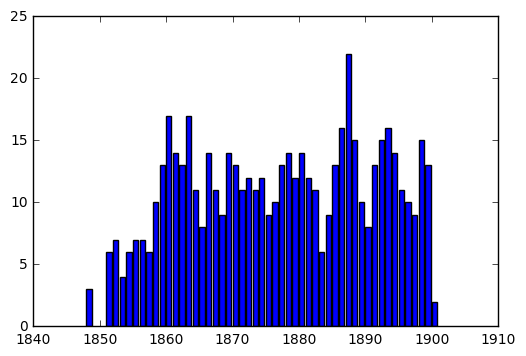

In [12]:
sorted_df = att_data_frame.sort_values('MEAN_season')
hurricane_freq = sorted_df.groupby('MEAN_season').count()

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.asarray(hurricane_freq.axes[0])
y = np.asarray(hurricane_freq['COUNT'])
fig, ax = plt.subplots()
ax.bar(x, y)

### Fit a trend line

[  8.51067944e-02  -1.48434647e+02]


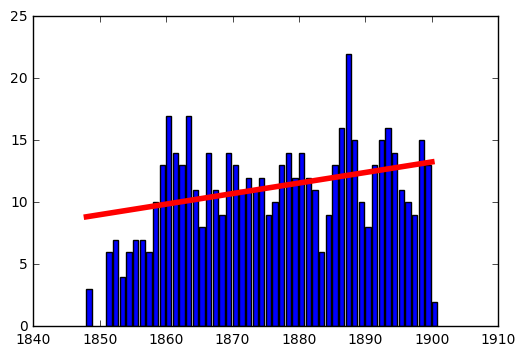

In [13]:
fit1 = np.polyfit(x, y, deg=1)
print(fit1)

ax.plot(x, x*fit1[0] + fit1[1], color='red', linewidth=4)

fig

# Has the duration of hurricanes increased over time?

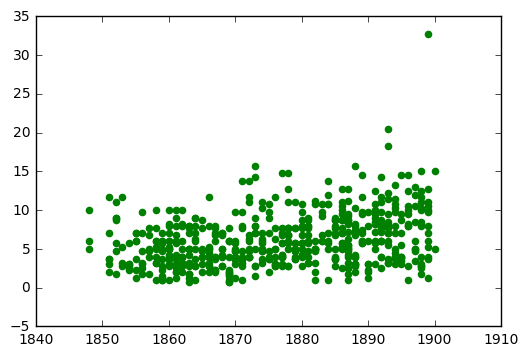

In [14]:
intensity_df = sorted_df[['MEAN_season', 'MAX_wind_wmo_','VAR_pres_wmo1', 'TRACK_DURATION']]
np_season = np.asarray(intensity_df['MEAN_season'])
np_duration = np.asarray(intensity_df['TRACK_DURATION'] / (1000*60*60*24))

fig2, ax2 = plt.subplots()
ax2.scatter(np_season, np_duration, color='green')

[  7.77924491e-02  -1.39884370e+02]


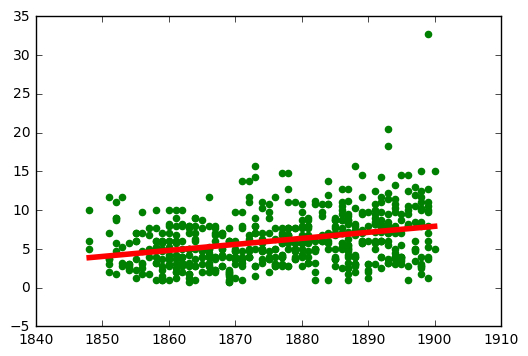

In [15]:
fit2_1 = np.polyfit(np_season, np_duration, deg=1)
ax2.plot(np_season, np_season * fit2_1[0] + fit2_1[1], linewidth=4, color='red')
print(fit2_1)

fig2